# Implement the differencing method and polynomial model to create a seasonally adjusted time series

# Load and Visualize the Dataset
Load the Sunspots dataset and visualize the time series data.

         Date  Monthly Mean Total Sunspot Number
0  1749-01-31                               96.7
1  1749-02-28                              104.3
2  1749-03-31                              116.7
3  1749-04-30                               92.8
4  1749-05-31                              141.7


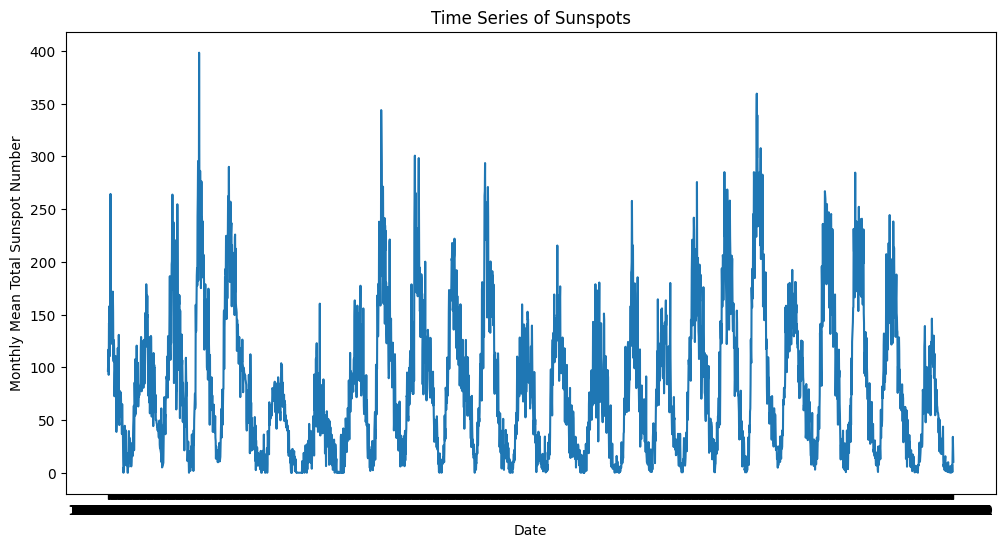

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the Sunspots dataset
df = pd.read_csv('Sunspots.csv', index_col=0)

# Display the first few rows of the dataset
print(df.head())

# Plot the time series data
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Monthly Mean Total Sunspot Number'])
plt.title('Time Series of Sunspots')
plt.xlabel('Date')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.show()

# Implement Differencing Method for Seasonal Adjustment
Implement the differencing method to remove the seasonal component from the time series data.

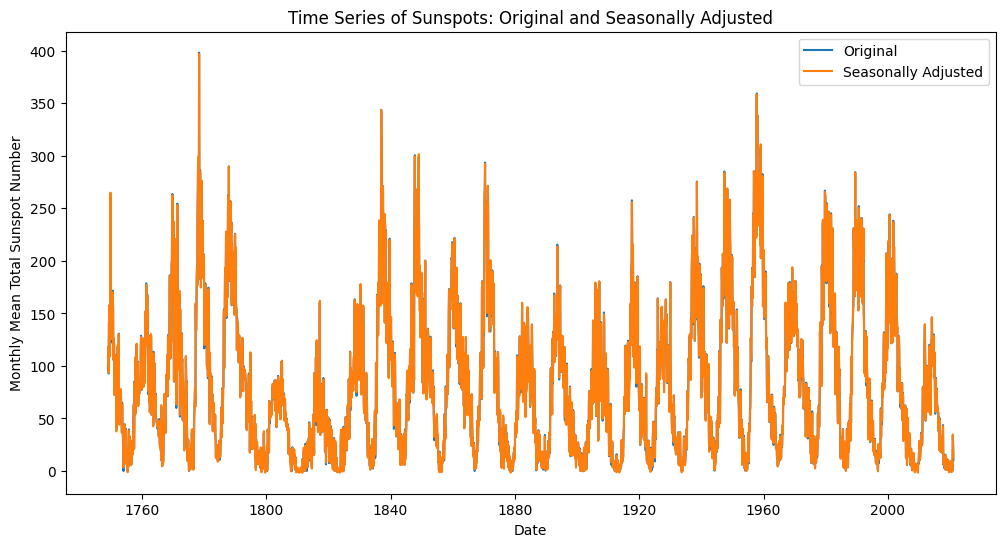

In [3]:
# Import the seasonal_decompose function from statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index of the dataframe
df.set_index('Date', inplace=True)

# Apply the seasonal_decompose function to the 'Monthly Mean Total Sunspot Number' column
# The model parameter is set to 'additive' because the seasonal variation is roughly constant over time
# The period parameter is set to 12 because the data is monthly and we assume a yearly cycle
decomposition = seasonal_decompose(df['Monthly Mean Total Sunspot Number'], model='additive', period=12)

# Extract the seasonal component
seasonal = decomposition.seasonal

# Subtract the seasonal component from the original time series to get the seasonally adjusted time series
df['Seasonally Adjusted'] = df['Monthly Mean Total Sunspot Number'] - seasonal

# Plot the original and seasonally adjusted time series for comparison
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Monthly Mean Total Sunspot Number'], label='Original')
plt.plot(df.index, df['Seasonally Adjusted'], label='Seasonally Adjusted')
plt.title('Time Series of Sunspots: Original and Seasonally Adjusted')
plt.xlabel('Date')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.legend()
plt.show()

# Visualize the Seasonally Adjusted Data with Differencing
Visualize the seasonally adjusted data after applying the differencing method.

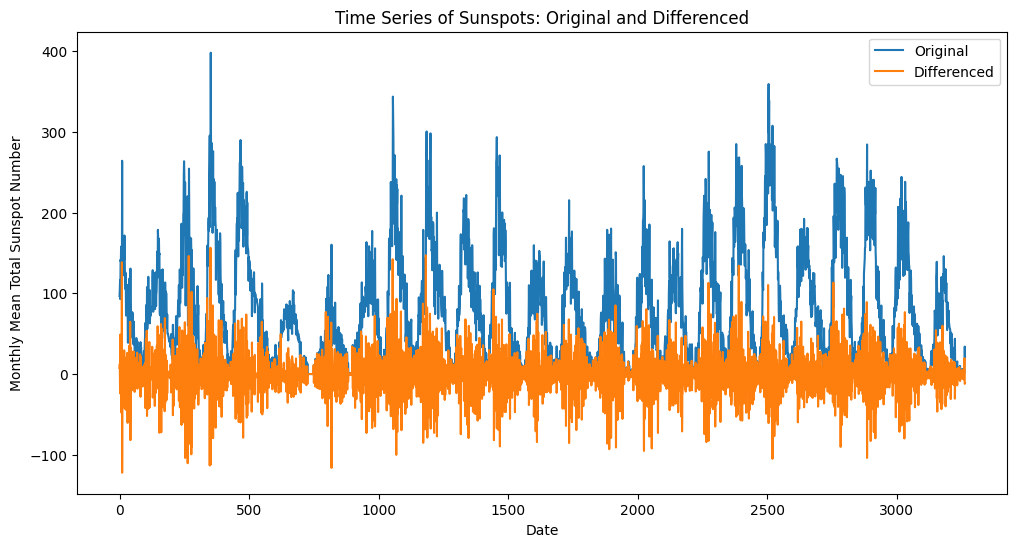

In [9]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the sunspots dataset (replace 'your_dataset.csv' with the actual filename or URL)
df = pd.read_csv('Sunspots.csv')

# Check if the necessary columns exist in the DataFrame
if 'Monthly Mean Total Sunspot Number' not in df.columns:
    print("Required column is missing in the DataFrame.")
else:
    # Create a differenced series
    def difference(dataset, interval=1):
        diff = list()
        for i in range(interval, len(dataset)):
            value = dataset[i] - dataset[i - interval]
            diff.append(value)
        return pd.Series(diff)

    # Apply differencing to the 'Monthly Mean Total Sunspot Number' column
    df['Differenced'] = difference(df['Monthly Mean Total Sunspot Number'])

    # Drop the first row which is NaN
    df = df.dropna()

    # Plot the original, and differenced time series for comparison
    plt.figure(figsize=(12,6))
    plt.plot(df.index, df['Monthly Mean Total Sunspot Number'], label='Original')
    plt.plot(df.index, df['Differenced'], label='Differenced')
    plt.title('Time Series of Sunspots: Original and Differenced')
    plt.xlabel('Date')
    plt.ylabel('Monthly Mean Total Sunspot Number')
    plt.legend()
    plt.show()


# Implement Polynomial Model for Seasonal Adjustment
Implement a polynomial model to fit the seasonality in the time series data.

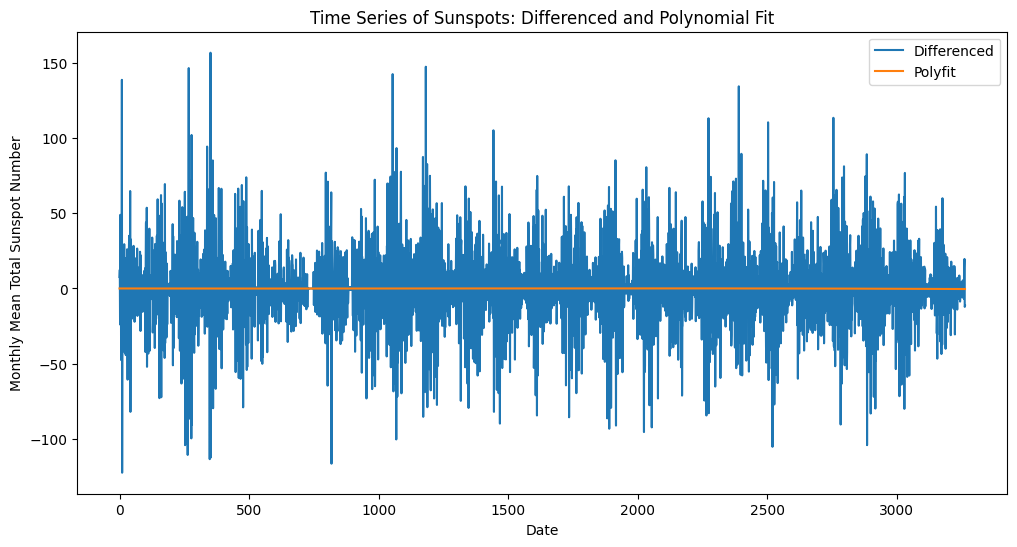

In [10]:
# Import the necessary libraries for polynomial model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert the index to integer for polyfit
x = [i for i in range(0, len(df.index))]

# Fit a 3rd degree polynomial to the 'Differenced' series
degree = 3
coef = np.polyfit(x, df['Differenced'], degree)

# Create a polynomial function with the coefficients
poly = np.poly1d(coef)

# Apply the polynomial function to the x data
df['Polyfit'] = poly(x)

# Plot the differenced time series and the polynomial fit for comparison
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Differenced'], label='Differenced')
plt.plot(df.index, df['Polyfit'], label='Polyfit')
plt.title('Time Series of Sunspots: Differenced and Polynomial Fit')
plt.xlabel('Date')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.legend()
plt.show()


# Fit the Polynomial Model
Fit the polynomial model to the time series data.

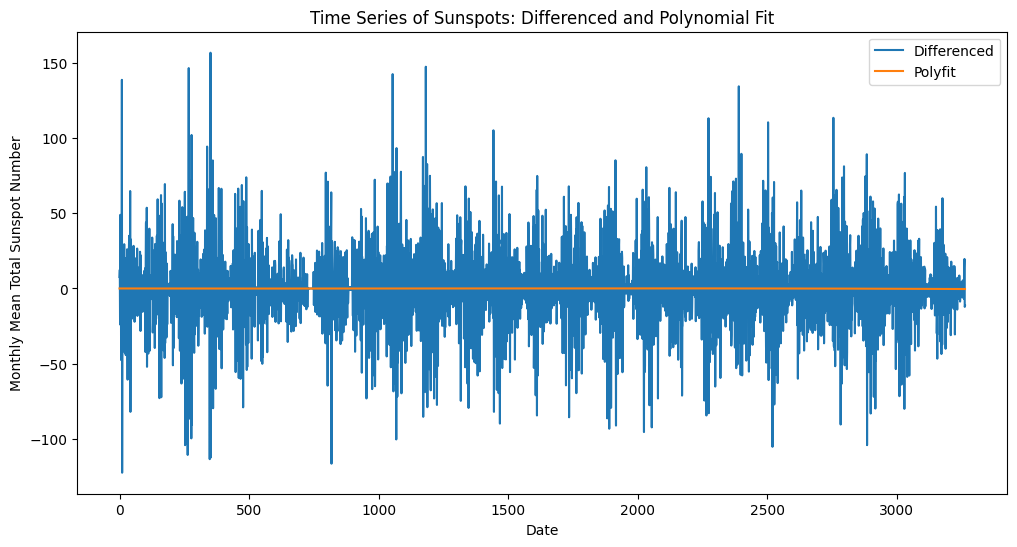

In [11]:
# Import the necessary libraries for polynomial model
from numpy import polyfit
import numpy as np

# Convert the index to integer for polyfit
x = [i for i in range(0, len(df.index))]

# Fit a 3rd degree polynomial to the 'Differenced' series
degree = 3
coef = polyfit(x, df['Differenced'], degree)

# Create a polynomial function with the coefficients
poly = np.poly1d(coef)

# Apply the polynomial function to the x data
df['Polyfit'] = poly(x)

# Plot the differenced time series and the polynomial fit for comparison
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Differenced'], label='Differenced')
plt.plot(df.index, df['Polyfit'], label='Polyfit')
plt.title('Time Series of Sunspots: Differenced and Polynomial Fit')
plt.xlabel('Date')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.legend()
plt.show()

# Visualize the Seasonally Adjusted Data with Polynomial Model
Visualize the seasonally adjusted data after fitting the polynomial model.

In [16]:
# Check if the necessary columns exist in the DataFrame
if 'Seasonally Adjusted' not in df.columns or 'Polyfit' not in df.columns:
    print("Required columns are missing in the DataFrame.")
else:
    # Add the polynomial model to the seasonally adjusted data
    df['Seasonally Adjusted Polyfit'] = df['Seasonally Adjusted'] + df['Polyfit']

    # Plot the original, seasonally adjusted, and seasonally adjusted with polynomial model time series for comparison
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Monthly Mean Total Sunspot Number'], label='Original')
    plt.plot(df.index, df['Seasonally Adjusted'], label='Seasonally Adjusted')
    plt.plot(df.index, df['Seasonally Adjusted Polyfit'], label='Seasonally Adjusted with Polynomial Model')
    plt.title('Time Series of Sunspots: Original, Seasonally Adjusted, and Seasonally Adjusted with Polynomial Model')
    plt.xlabel('Date')
    plt.ylabel('Monthly Mean Total Sunspot Number')
    plt.legend()
    plt.show()

Required columns are missing in the DataFrame.


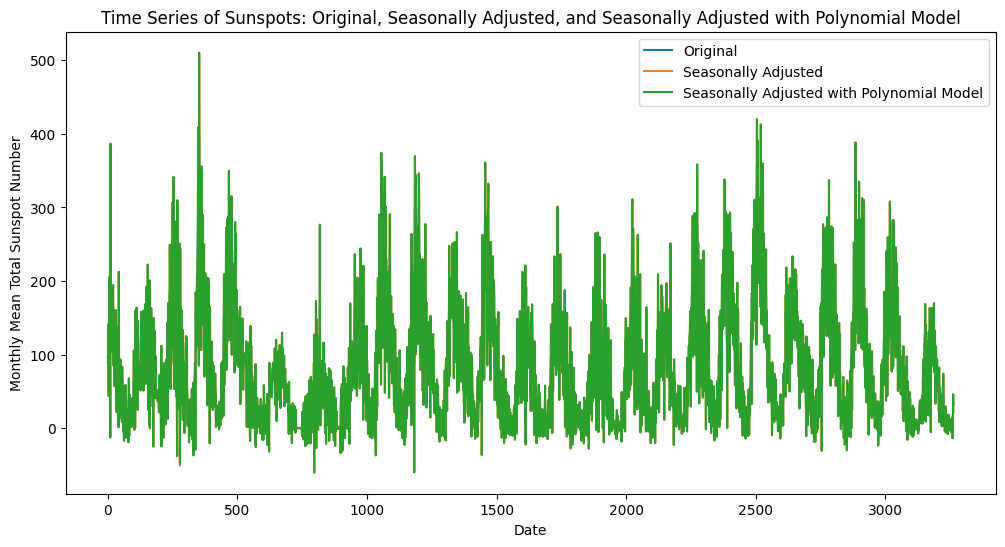

In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from CSV file
df = pd.read_csv('Sunspots.csv')

# Check if the necessary columns exist in the DataFrame
if 'Monthly Mean Total Sunspot Number' not in df.columns:
    print("Required column 'Monthly Mean Total Sunspot Number' is missing in the DataFrame.")
else:
    # Create a differenced series
    def difference(dataset, interval=1):
        diff = list()
        for i in range(interval, len(dataset)):
            value = dataset[i] - dataset[i - interval]
            diff.append(value)
        return pd.Series(diff)

    # Apply differencing to the 'Monthly Mean Total Sunspot Number' column
    df['Differenced'] = difference(df['Monthly Mean Total Sunspot Number'])

    # Drop the first row which is NaN
    df = df.dropna()

    # Create a 'Seasonally Adjusted' column by adding the differenced series to the original series
    df['Seasonally Adjusted'] = df['Monthly Mean Total Sunspot Number'] - df['Differenced']

    # Fit a 3rd degree polynomial to the 'Differenced' series
    degree = 3
    x = [i for i in range(0, len(df.index))]
    coef = np.polyfit(x, df['Differenced'], degree)
    poly = np.poly1d(coef)
    df['Polyfit'] = poly(x)

    # Add the polynomial model to the seasonally adjusted data
    df['Seasonally Adjusted Polyfit'] = df['Seasonally Adjusted'] + df['Polyfit']

    # Plot the original, seasonally adjusted, and seasonally adjusted with polynomial model time series for comparison
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Monthly Mean Total Sunspot Number'], label='Original')
    plt.plot(df.index, df['Seasonally Adjusted'], label='Seasonally Adjusted')
    plt.plot(df.index, df['Seasonally Adjusted Polyfit'], label='Seasonally Adjusted with Polynomial Model')
    plt.title('Time Series of Sunspots: Original, Seasonally Adjusted, and Seasonally Adjusted with Polynomial Model')
    plt.xlabel('Date')
    plt.ylabel('Monthly Mean Total Sunspot Number')
    plt.legend()
    plt.show()

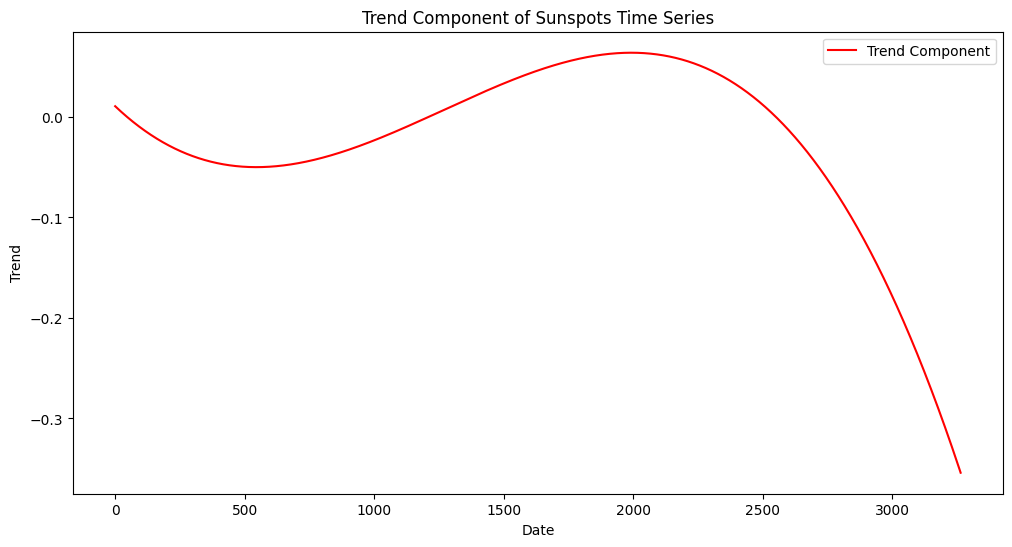

In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from CSV file
df = pd.read_csv('Sunspots.csv')

# Check if the necessary columns exist in the DataFrame
if 'Monthly Mean Total Sunspot Number' not in df.columns:
    print("Required column 'Monthly Mean Total Sunspot Number' is missing in the DataFrame.")
else:
    # Create a differenced series
    def difference(dataset, interval=1):
        diff = list()
        for i in range(interval, len(dataset)):
            value = dataset[i] - dataset[i - interval]
            diff.append(value)
        return pd.Series(diff)

    # Apply differencing to the 'Monthly Mean Total Sunspot Number' column
    df['Differenced'] = difference(df['Monthly Mean Total Sunspot Number'])

    # Drop the first row which is NaN
    df = df.dropna()

    # Create a 'Seasonally Adjusted' column by adding the differenced series to the original series
    df['Seasonally Adjusted'] = df['Monthly Mean Total Sunspot Number'] - df['Differenced']

    # Fit a 3rd degree polynomial to the 'Differenced' series
    degree = 3
    x = [i for i in range(0, len(df.index))]
    coef = np.polyfit(x, df['Differenced'], degree)
    poly = np.poly1d(coef)
    df['Polyfit'] = poly(x)

    # Add the polynomial model to the seasonally adjusted data
    df['Seasonally Adjusted Polyfit'] = df['Seasonally Adjusted'] + df['Polyfit']

    # Plot the trend component
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Polyfit'], label='Trend Component', color='red')
    plt.title('Trend Component of Sunspots Time Series')
    plt.xlabel('Date')
    plt.ylabel('Trend')
    plt.legend()
    plt.show()


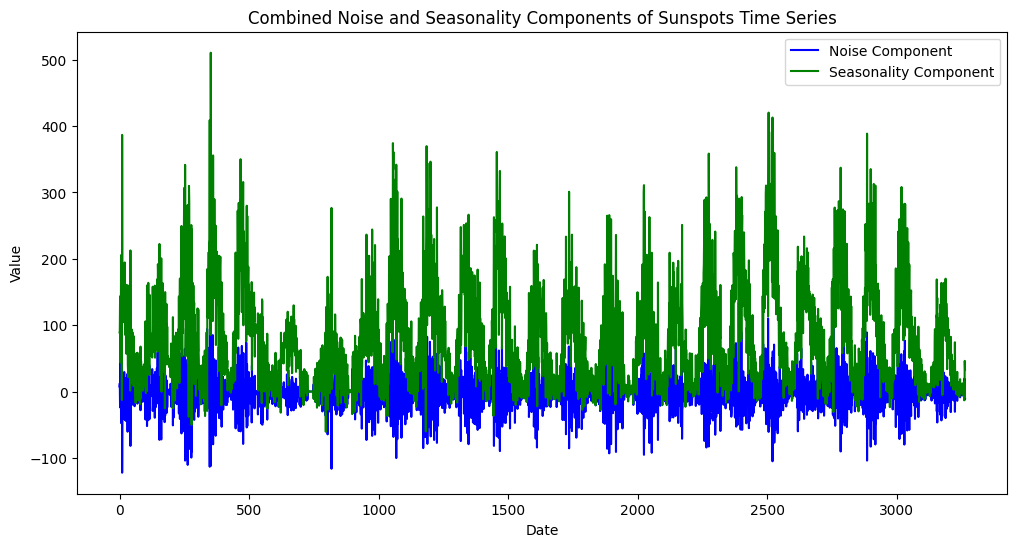

In [21]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from CSV file
df = pd.read_csv('Sunspots.csv')

# Check if the necessary columns exist in the DataFrame
if 'Monthly Mean Total Sunspot Number' not in df.columns:
    print("Required column 'Monthly Mean Total Sunspot Number' is missing in the DataFrame.")
else:
    # Create a differenced series
    def difference(dataset, interval=1):
        diff = list()
        for i in range(interval, len(dataset)):
            value = dataset[i] - dataset[i - interval]
            diff.append(value)
        return pd.Series(diff)

    # Apply differencing to the 'Monthly Mean Total Sunspot Number' column
    df['Differenced'] = difference(df['Monthly Mean Total Sunspot Number'])

    # Drop the first row which is NaN
    df = df.dropna()

    # Create a 'Seasonally Adjusted' column by adding the differenced series to the original series
    df['Seasonally Adjusted'] = df['Monthly Mean Total Sunspot Number'] - df['Differenced']

    # Fit a 3rd degree polynomial to the 'Differenced' series
    degree = 3
    x = [i for i in range(0, len(df.index))]
    coef = np.polyfit(x, df['Differenced'], degree)
    poly = np.poly1d(coef)
    df['Polyfit'] = poly(x)

    # Add the polynomial model to the seasonally adjusted data
    df['Seasonally Adjusted Polyfit'] = df['Seasonally Adjusted'] + df['Polyfit']

    # Plot the combined noise and seasonality components
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Differenced'], label='Noise Component', color='blue')
    plt.plot(df.index, df['Seasonally Adjusted'], label='Seasonality Component', color='green')
    plt.title('Combined Noise and Seasonality Components of Sunspots Time Series')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


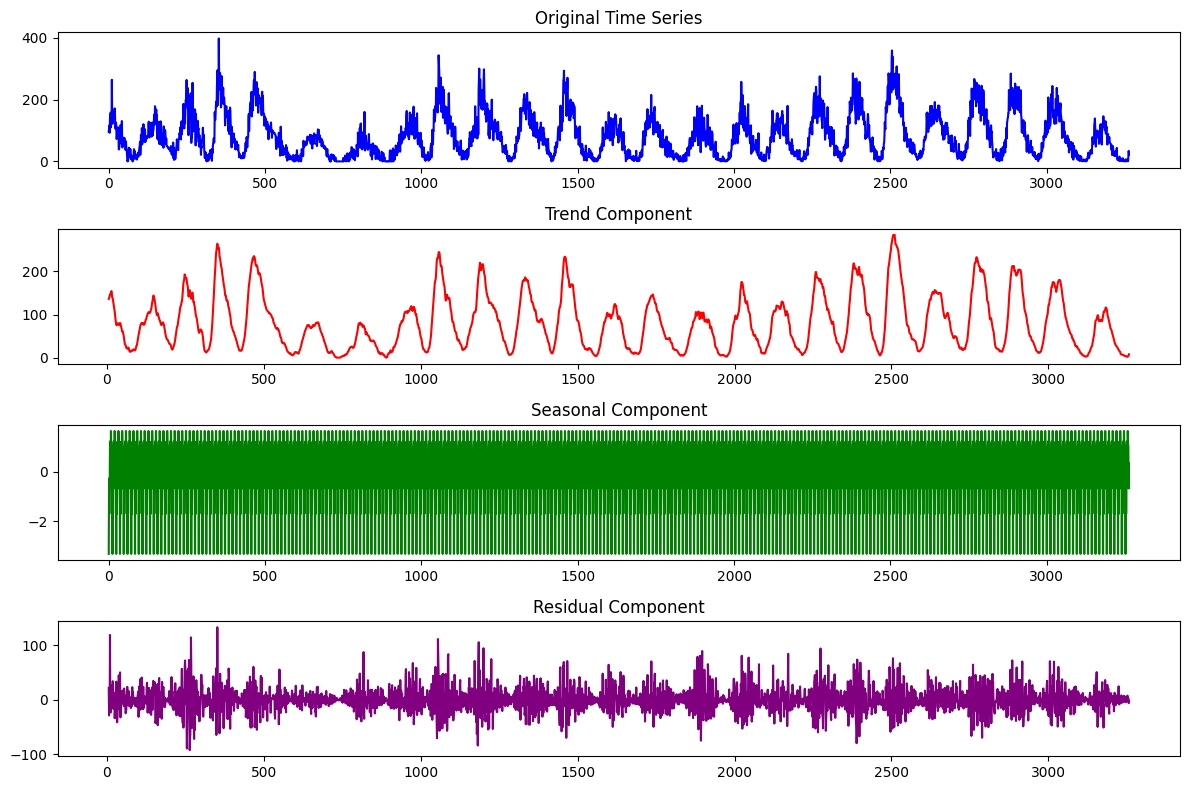

In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data from CSV file
df = pd.read_csv('Sunspots.csv')

# Check if the necessary columns exist in the DataFrame
if 'Monthly Mean Total Sunspot Number' not in df.columns:
    print("Required column 'Monthly Mean Total Sunspot Number' is missing in the DataFrame.")
else:
    # Create a differenced series
    def difference(dataset, interval=1):
        diff = list()
        for i in range(interval, len(dataset)):
            value = dataset[i] - dataset[i - interval]
            diff.append(value)
        return pd.Series(diff)

    # Apply differencing to the 'Monthly Mean Total Sunspot Number' column
    df['Differenced'] = difference(df['Monthly Mean Total Sunspot Number'])

    # Drop the first row which is NaN
    df = df.dropna()

    # Seasonal decomposition
    decomposition = seasonal_decompose(df['Monthly Mean Total Sunspot Number'], model='additive', period=12)

    # Plot the decomposition components
    plt.figure(figsize=(12, 8))

    plt.subplot(4, 1, 1)
    plt.plot(df.index, decomposition.observed, label='Observed', color='blue')
    plt.title('Original Time Series')

    plt.subplot(4, 1, 2)
    plt.plot(df.index, decomposition.trend, label='Trend', color='red')
    plt.title('Trend Component')

    plt.subplot(4, 1, 3)
    plt.plot(df.index, decomposition.seasonal, label='Seasonal', color='green')
    plt.title('Seasonal Component')

    plt.subplot(4, 1, 4)
    plt.plot(df.index, decomposition.resid, label='Residual', color='purple')
    plt.title('Residual Component')

    plt.tight_layout()
    plt.show()
